<a href="https://colab.research.google.com/github/alaajomah/ML/blob/main/resnet50v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from tensorflow.keras import applications

import tensorflow as tf
from tensorflow.keras.preprocessing.image import Iterator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Input, Lambda, Conv2D, MaxPooling2D
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, img_to_array
import tensorflow as tf

import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

In [3]:
# Get the Horse or Human training dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Get the Horse or Human validation dataset
!wget -q -P /content/ https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

test_local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/training')

val_local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/validation')

zip_ref.close()

In [4]:
# Define the training and validation base directories
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Directory with training horse pictures
train_horses_dir = os.path.join(train_dir, 'horses')
# Directory with training humans pictures
train_humans_dir = os.path.join(train_dir, 'humans')
# Directory with validation horse pictures
validation_horses_dir = os.path.join(validation_dir, 'horses')
# Directory with validation human pictures
validation_humans_dir = os.path.join(validation_dir, 'humans')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_horses_dir))} images of horses for training.\n")
print(f"There are {len(os.listdir(train_humans_dir))} images of humans for training.\n")
print(f"There are {len(os.listdir(validation_horses_dir))} images of horses for validation.\n")
print(f"There are {len(os.listdir(validation_humans_dir))} images of humans for validation.\n")

There are 500 images of horses for training.

There are 527 images of humans for training.

There are 128 images of horses for validation.

There are 128 images of humans for validation.



In [6]:
# Load the first example of a horse
sample_image  = load_img(f"{os.path.join(train_horses_dir, os.listdir(train_horses_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [7]:
IMAGE_SIZE = [150,150]

In [37]:
resent_model = ResNet50V2(include_top=False, weights='imagenet',input_shape=(300, 300, 3))

In [38]:
for layer in resent_model.layers:
    layer.trainable = False

In [55]:
x = Conv2D(128, (3, 3), activation='relu')(resent_model.output)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=resent_model.input, outputs=x)

In [56]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    horizontal_flip = True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [58]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (300,300),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 1027 images belonging to 2 classes.


In [59]:
testing_set = test_datagen.flow_from_directory(validation_dir,
                                               target_size = (300,300),
                                               batch_size = 128,
                                               class_mode = 'categorical')

Found 256 images belonging to 2 classes.


In [60]:
hist = model.fit(training_set,
                validation_data = testing_set,
                epochs = 20,
                steps_per_epoch=len(training_set),
                validation_steps=len(testing_set))

Epoch 1/20
9/9 [==============================] - 530s 59s/step - loss: 2.4616 - accuracy: 0.8471 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 521s 58s/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 518s 58s/step - loss: 5.2632e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 458s 51s/step - loss: 2.7357e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 517s 58s/step - loss: 3.0408e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 457s 51s/step - loss: 0.0111 - accuracy: 0.9990 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 519s 58s/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0000e+00 - v

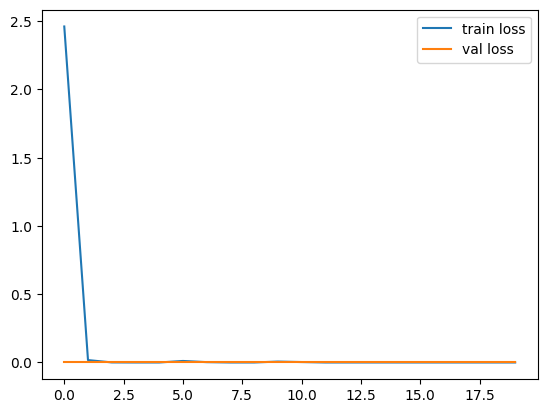

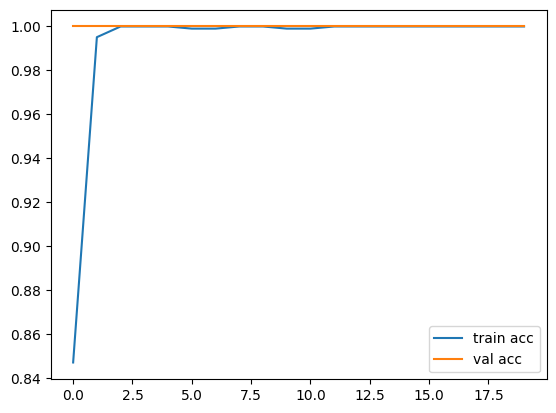

<Figure size 640x480 with 0 Axes>

In [61]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')